In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
import scipy.stats as stats
import pylab  

import warnings
warnings.filterwarnings('ignore')

In [1]:
#Reading local csv file with pandas
import pandas as pd
green_2015_data_path=(r'E:\Masters\Data Engineering\New York Cabs Datasets in csv\green_tripdata_2015-12.csv')
green_2015_data = pd.read_csv(green_2015_data_path, nrows=1000)
green_2015_data.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-12-01 00:12:54,2015-12-01 00:18:18,N,1,-73.844681,40.721508,-73.836334,40.708878,1,...,6.5,0.5,0.5,1.56,0.0,NaN,0.3,9.36,1,1
1,2,2015-12-01 00:48:19,2015-12-01 00:59:31,N,1,-73.807030,40.699657,-73.863670,40.691143,1,...,12.5,0.5,0.5,2.00,0.0,NaN,0.3,15.80,1,1
2,2,2015-12-01 00:06:13,2015-12-01 00:20:40,N,1,-73.961815,40.805641,-73.925980,40.824123,2,...,13.5,0.5,0.5,4.44,0.0,NaN,0.3,19.24,1,1
3,2,2015-12-01 00:43:38,2015-12-01 00:59:37,N,1,-73.945221,40.808384,-73.959587,40.801357,1,...,12.5,0.5,0.5,2.76,0.0,NaN,0.3,16.56,1,1
4,2,2015-12-01 00:04:50,2015-12-01 00:09:40,N,1,-73.939018,40.805542,-73.943977,40.813740,5,...,5.5,0.5,0.5,1.00,0.0,NaN,0.3,7.80,1,1


In [3]:
#Initialising the MongoDB server
import pymongo
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
mydb = client.Taxi_Database

In [ ]:
#Storing data into MongoDB
collection_green = mydb.yellow_taxi_data
records_ = green_2015_data.to_dict(orient = 'records')
result = mydb.green_2015_data.insert_many(records_)

In [4]:
%%time
#Accessing MongoDB data with pandas
green_md = pd.DataFrame(list(mydb.green_2015_data.find({})))
green_md.head()

Wall time: 194 ms


,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,Passenger_count,Payment_type,Pickup_latitude,...,Store_and_fwd_flag,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,VendorID,_id,improvement_surcharge,lpep_pickup_datetime
0,40.708878,-73.836334,NaN,0.5,6.5,2015-12-01 00:18:18,0.5,1,1,40.721508,...,N,1.56,0.0,9.36,1.27,1,2,5d7f98b1efa855e5996ce207,0.3,2015-12-01 00:12:54
1,40.691143,-73.863670,NaN,0.5,12.5,2015-12-01 00:59:31,0.5,1,1,40.699657,...,N,2.00,0.0,15.80,3.57,1,2,5d7f98b1efa855e5996ce208,0.3,2015-12-01 00:48:19
2,40.824123,-73.925980,NaN,0.5,13.5,2015-12-01 00:20:40,0.5,2,1,40.805641,...,N,4.44,0.0,19.24,3.51,1,2,5d7f98b1efa855e5996ce209,0.3,2015-12-01 00:06:13
3,40.801357,-73.959587,NaN,0.5,12.5,2015-12-01 00:59:37,0.5,1,1,40.808384,...,N,2.76,0.0,16.56,2.43,1,2,5d7f98b1efa855e5996ce20a,0.3,2015-12-01 00:43:38
4,40.813740,-73.943977,NaN,0.5,5.5,2015-12-01 00:09:40,0.5,5,1,40.805542,...,N,1.00,0.0,7.80,0.89,1,2,5d7f98b1efa855e5996ce20b,0.3,2015-12-01 00:04:50


In [96]:
green_md.head()

,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,Passenger_count,Payment_type,Pickup_latitude,...,improvement_surcharge,lpep_pickup_datetime,trip_time,trip_speed,pickup_day,dropoff_day,hour_of_pickup,hour_of_dropoff,minute_of_pickup,minute_of_dropoff
0,40.708878,-73.836334,NaN,0.5,6.5,2015-12-01 00:18:18,0.5,1,1,40.721508,...,0.3,2015-12-01 00:12:54,5.0,0.254000,Tuesday,Tuesday,0,18,12,18
1,40.691143,-73.863670,NaN,0.5,12.5,2015-12-01 00:59:31,0.5,1,1,40.699657,...,0.3,2015-12-01 00:48:19,11.0,0.324545,Tuesday,Tuesday,0,59,48,59
2,40.824123,-73.925980,NaN,0.5,13.5,2015-12-01 00:20:40,0.5,2,1,40.805641,...,0.3,2015-12-01 00:06:13,14.0,0.250714,Tuesday,Tuesday,0,20,6,20
3,40.801357,-73.959587,NaN,0.5,12.5,2015-12-01 00:59:37,0.5,1,1,40.808384,...,0.3,2015-12-01 00:43:38,15.0,0.162000,Tuesday,Tuesday,0,59,43,59
4,40.813740,-73.943977,NaN,0.5,5.5,2015-12-01 00:09:40,0.5,5,1,40.805542,...,0.3,2015-12-01 00:04:50,4.0,0.222500,Tuesday,Tuesday,0,9,4,9


In [100]:
#Calculating trip time
green_2015_data['lpep_pickup_datetime'] = pd.to_datetime(green_2015_data['lpep_pickup_datetime'], infer_datetime_format=True)
green_2015_data['Lpep_dropoff_datetime'] = pd.to_datetime(green_2015_data['Lpep_dropoff_datetime'], infer_datetime_format=True)
tdelta = green_2015_data['Lpep_dropoff_datetime'] - green_2015_data['lpep_pickup_datetime']
green_2015_data['trip_time'] = tdelta.astype('timedelta64[m]')

#Calculating average trip speed
green_2015_data['trip_speed'] = green_2015_data['Trip_distance'] / green_2015_data['trip_time']

In [112]:
#Extracting pickup and dropoff day of week
green_2015_data['pickup_day'] = green_2015_data['lpep_pickup_datetime'].dt.weekday_name
green_2015_data['dropoff_day'] = green_2015_data['Lpep_dropoff_datetime'].dt.weekday_name

In [88]:
green_md.describe()

,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,MTA_tax,Passenger_count,Payment_type,Pickup_latitude,Pickup_longitude,RateCodeID,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,VendorID,improvement_surcharge,trip_time,trip_speed
count,1000.000000,1000.000000,0.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,992.000000
mean,40.740990,-73.925605,NaN,0.483000,10.982500,0.483000,1.371000,1.563000,40.701580,-73.856675,1.095000,0.941770,0.055400,13.236070,2.665120,1.022000,1.805000,0.290400,17.502000,inf
std,0.058869,0.049278,NaN,0.103546,26.659335,0.103546,1.071684,0.546195,1.289576,2.338299,0.606913,1.854485,0.551499,26.826616,5.570901,0.146757,0.396399,0.060758,109.124141,NaN
min,40.576416,-74.160164,NaN,-0.500000,-9.000000,-0.500000,0.000000,1.000000,0.000000,-74.160164,1.000000,0.000000,0.000000,-10.300000,0.000000,1.000000,1.000000,-0.300000,0.000000,0.000000
25%,40.695029,-73.955910,NaN,0.500000,5.500000,0.500000,1.000000,1.000000,40.699361,-73.957304,1.000000,0.000000,0.000000,7.300000,0.980000,1.000000,2.000000,0.300000,4.000000,0.210000
50%,40.737049,-73.938236,NaN,0.500000,8.000000,0.500000,1.000000,2.000000,40.741735,-73.943676,1.000000,0.000000,0.000000,10.300000,1.800000,1.000000,2.000000,0.300000,7.000000,0.254083
75%,40.781402,-73.899050,NaN,0.500000,12.500000,0.500000,1.000000,2.000000,40.791748,-73.912016,1.000000,1.700000,0.000000,15.300000,3.232500,1.000000,2.000000,0.300000,12.000000,0.316167
max,40.912746,-73.733376,NaN,0.500000,826.000000,0.500000,6.000000,5.000000,40.927448,0.000000,5.000000,36.000000,5.540000,827.300000,162.290000,2.000000,2.000000,0.300000,1438.000000,inf


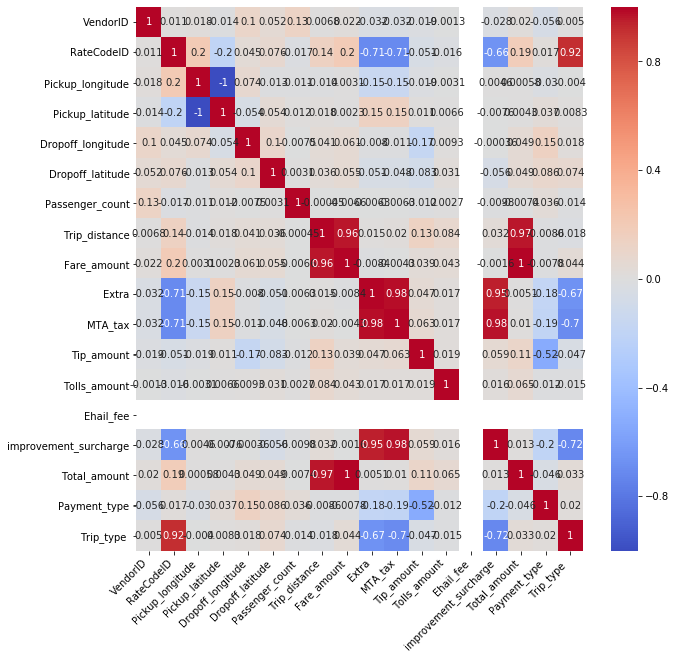

In [86]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(green_2015_data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

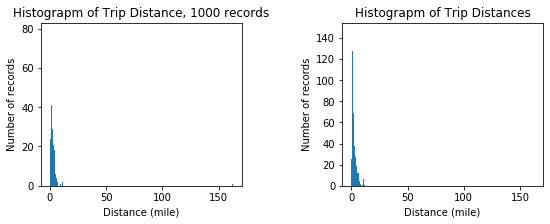

In [103]:
#Plot Trip Distance 
fig, axs = plt.subplots(1,2)
fig.set_size_inches(9, 3)
fig.subplots_adjust(wspace=.5)

axs[0].hist(green_2015_data['Trip_distance'],bins=1000);
axs[0].set_title('Histograpm of Trip Distance, 1000 records')
axs[0].set_xlabel('Distance (mile)')
axs[0].set_ylabel('Number of records')

axs[1].hist(green_2015_data['Trip_distance'],bins=500);
axs[1].set_title('Histograpm of Trip Distances')
axs[1].set_xlabel('Distance (mile)')
axs[1].set_ylabel('Number of records');

In [107]:
green_2015_data['minute_of_dropoff'] = green_2015_data['Lpep_dropoff_datetime'].dt.minute

In [108]:
green_2015_data['minute_of_pickup'] = green_2015_data['lpep_pickup_datetime'].dt.minute

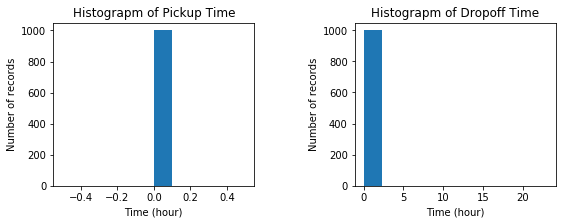

In [105]:
#Plot Hour of Trip 
fig, axs = plt.subplots(1,2)
fig.set_size_inches(9, 3)
fig.subplots_adjust(wspace=.5)

axs[0].hist(green_2015_data['hour_of_pickup']);
axs[0].set_title('Histograpm of Pickup Time')
axs[0].set_xlabel('Time (hour)')
axs[0].set_ylabel('Number of records')

axs[1].hist(green_2015_data['hour_of_dropoff']);
axs[1].set_title('Histograpm of Dropoff Time')
axs[1].set_xlabel('Time (hour)')
axs[1].set_ylabel('Number of records');

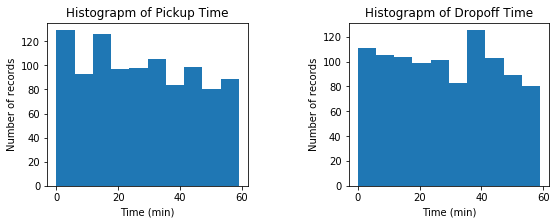

In [109]:
#Plot Minute of Trip 
fig, axs = plt.subplots(1,2)
fig.set_size_inches(9, 3)
fig.subplots_adjust(wspace=.5)

axs[0].hist(green_2015_data['minute_of_pickup']);
axs[0].set_title('Histograpm of Pickup Time')
axs[0].set_xlabel('Time (min)')
axs[0].set_ylabel('Number of records')

axs[1].hist(green_2015_data['minute_of_dropoff']);
axs[1].set_title('Histograpm of Dropoff Time')
axs[1].set_xlabel('Time (min)')
axs[1].set_ylabel('Number of records');

In [113]:
sort_by_tip = green_2015_data.sort_values('Tip_amount',ascending=True)
print(sort_by_tip.head(n=15))

     VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
499         2  2015-12-01 00:15:57   2015-12-01 00:37:05                  N   
575         2  2015-12-01 00:05:04   2015-12-01 00:12:15                  N   
576         2  2015-12-01 00:17:45   2015-12-01 00:27:22                  N   
577         2  2015-12-01 00:40:36   2015-12-01 00:44:32                  N   
578         2  2015-12-01 00:45:05   2015-12-01 00:51:59                  N   
579         2  2015-12-01 00:35:08   2015-12-01 00:51:05                  N   
580         2  2015-12-01 00:12:21   2015-12-01 00:19:14                  N   
581         2  2015-12-01 00:25:30   2015-12-01 00:28:36                  N   
582         2  2015-12-01 00:49:06   2015-12-01 00:53:33                  N   
583         2  2015-12-01 00:35:13   2015-12-01 00:44:45                  N   
573         2  2015-12-01 00:22:31   2015-12-01 00:32:10                  N   
585         2  2015-12-01 00:15:58   2015-12-01 00:2

In [ ]:
#Plot Highest no. of trips based on Days
fig, axs = plt.subplots(1,2)
fig.set_size_inches(9, 3)
fig.subplots_adjust(wspace=.5)

axs[0].hist(green_2015_data['pickup_day']);
axs[0].set_title('Highest no. of pickup trips based on Days')
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Number of records')

axs[1].hist(green_2015_data['dropoff_day']);
axs[1].set_title('Highest no. of dropoff trips based on Days')
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Number of records');

In [5]:
%%time
#Plotting all Pickup points Google Maps
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.models.tools import HoverTool

output_file("first_gmap.html")

map_options = GMapOptions(lat = 40.785091, lng = -73.968285, map_type = "roadmap", zoom = 10)
bokeh_plot = gmap("GOOGLE_API_KEY", map_options, title = "NYC Taxi Pick-up Locations")

source2 = ColumnDataSource(
    data = dict(lat = green_md.Pickup_latitude[:500],
              lon = green_md.Pickup_longitude [:500])
)

bokeh_plot.circle(x = "lon", y = "lat", size = 10,  color = "green", fill_alpha = 0.8, source = source2)

show(bokeh_plot)

Wall time: 4.43 s


In [7]:
%%time
#Plotting all Dropoff points Google Maps
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.models.tools import HoverTool

output_file("first_gmap.html")

map_options = GMapOptions(lat = 40.785091, lng = -73.968285, map_type = "roadmap", zoom = 10)
bokeh_plot = gmap("GOOGLE_API_KEY", map_options, title = "NYC Taxi Drop-Off Locations")

source1 = ColumnDataSource(
    data = dict(lat = green_md.Dropoff_latitude[:1000],
              lon = green_md.Dropoff_longitude[:1000])
)

bokeh_plot.circle(x = "lon", y = "lat", size = 10,  color = "red", fill_alpha = 0.8, source = source1)

show(bokeh_plot)

Wall time: 96.7 ms


In [8]:
%%time
#Plotting Pickup and Dropoff on Google Maps
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.models.tools import HoverTool

output_file("first_gmap.html")

map_options = GMapOptions(lat = 40.785091, lng = -73.968285, map_type = "roadmap", zoom = 11)
bokeh_plot = gmap("GOOGLE_API_KEY", map_options, title = "Overall Pickup and Dropoff Locations")

source1 = ColumnDataSource(
    data = dict(lat = green_md.Dropoff_latitude[:1000],
              lon = green_md.Dropoff_longitude[:1000])
)

source2 = ColumnDataSource(
    data = dict(lat = green_md.Pickup_latitude[:1000],
              lon = green_md.Pickup_longitude [:1000])
)

bokeh_plot.circle(x = "lon", y = "lat", size = 10, color = "red", fill_alpha = 0.8, source = source1)
bokeh_plot.circle(x = "lon", y = "lat", size = 10,  color = "green", fill_alpha = 0.8, source = source2)

show(bokeh_plot)

Wall time: 148 ms
